In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import sklearn

In [2]:
key='e0e25aac6ef01a3928c6904c4377a082f1ad8f48'
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\hp\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-09-12 00:00:00+00:00  221.07  225.00  219.84  224.94  49278740   
       2018-09-13 00:00:00+00:00  226.41  228.35  222.57  223.52  41706377   
       2018-09-14 00:00:00+00:00  223.84  226.84  222.52  225.75  31999289   
       2018-09-17 00:00:00+00:00  217.88  222.95  217.27  222.15  37195133   
       2018-09-18 00:00:00+00:00  218.24  221.85  217.12  217.79  31571712   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-09-12 00:00:00+00:00  52.927661  53.868565  52.633179  53.854200   
       2018-09-13 00:00:00+00:00  54.206141  54.670608  53.286785  53.514230   
       2018-09-14 00:00:00+00:00  53.590843  54.309090  53.274814  54.048127   
       2018-09-17 00:00:00+00:00  52.163924  53.377763  52.017881  53.186230   
       2018-09-18 00:00:00+00:00  52.250114  53.114405  51.981968  52.142377   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-09-12 00:00:00+00:00  197114960      0.0          1.0  
       2018-09-13 00:00:00+00:00  166825508      0.0          1.0  
       2018-09-14 00:00:00+00:00  127997156      0.0          1.0  
       2018-09-17 00:00:00+00:00  148780532      0.0          1.0  
       2018-09-18 00:00:00+00:00  126286848      0.0          1.0

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
1,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
2,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
3,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
4,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1252,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1253,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1254,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1255,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape

(1256,)

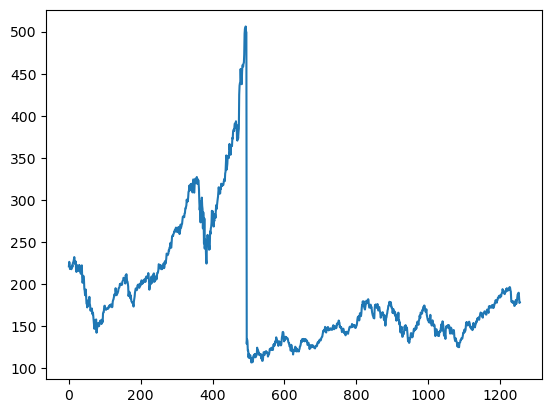

In [11]:
plt.plot(df1)

In [12]:
# LSTM are sensitive to the scale of the data. so we apply minmax scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(1256, 1)

In [16]:
df1

array([[0.28611146],
       [0.29948654],
       [0.29304947],
       ...,
       [0.19053225],
       [0.17713212],
       [0.17868503]])

In [17]:
# split the data into test and train 

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(816, 440)

In [19]:
len(train_data),len(test_data)

(816, 440)

In [20]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]           ### i = 0
        dataX.append(a)
        dataY.append(dataset[i +time_step, 0])
    return np.array(dataX),np.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [22]:
X_train.shape, y_train.shape

((715, 100), (715,))

In [23]:
X_test.shape,ytest.shape

((339, 100), (339,))

In [24]:
# reshape input to be [samples,time steps,features] wich is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =  X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
# create the LSTM model
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

In [27]:
model = Sequential()

In [28]:
model.add(LSTM(50,return_sequences= True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')  # Specify optimizer and loss function

In [29]:
 model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 473ms/step - loss: 0.0464 - val_loss: 0.0029
Epoch 2/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0202 - val_loss: 0.0050
Epoch 3/100
12/12 [==============================] - 4s 306ms/step - loss: 0.0128 - val_loss: 5.2131e-04
Epoch 4/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0108 - val_loss: 3.6010e-04
Epoch 5/100
12/12 [==============================] - 4s 310ms/step - loss: 0.0091 - val_loss: 3.5340e-04
Epoch 6/100
12/12 [==============================] - 3s 283ms/step - loss: 0.0081 - val_loss: 4.1122e-04
Epoch 7/100
12/12 [==============================] - 3s 278ms/step - loss: 0.0072 - val_loss: 3.3766e-04
Epoch 8/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0068 - val_loss: 8.2526e-04
Epoch 9/100
12/12 [==============================] - 4s 299ms/step - loss: 0.0060 - val_loss: 3.1604e-04
Epoch 10/100
12/12 [==============================] - 4s 294ms

12/12 [==============================] - 3s 264ms/step - loss: 9.8865e-04 - val_loss: 2.3405e-04
Epoch 79/100
12/12 [==============================] - 4s 294ms/step - loss: 0.0019 - val_loss: 2.2013e-04
Epoch 80/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0015 - val_loss: 2.4027e-04
Epoch 81/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0018 - val_loss: 2.2107e-04
Epoch 82/100
12/12 [==============================] - 3s 285ms/step - loss: 0.0011 - val_loss: 2.1755e-04
Epoch 83/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0013 - val_loss: 2.1297e-04
Epoch 84/100
12/12 [==============================] - 3s 291ms/step - loss: 0.0012 - val_loss: 2.0661e-04
Epoch 85/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0011 - val_loss: 2.2127e-04
Epoch 86/100
12/12 [==============================] - 3s 277ms/step - loss: 0.0015 - val_loss: 2.1238e-04
Epoch 87/100
12/12 [==============================] - 3

In [31]:
# lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict= model.predict(X_test)

11/11 [==============================] - 1s 51ms/step


In [32]:
# tranformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict =scaler.inverse_transform(test_predict)

In [33]:

import math 
from sklearn.metrics import mean_squared_error
 

In [34]:
# calculate to RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

221.15659179461247

In [35]:
# test data rmse
math.sqrt(mean_squared_error(ytest,test_predict))

158.32868222431037

In [36]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 :len(df1)-1,:] = test_predict


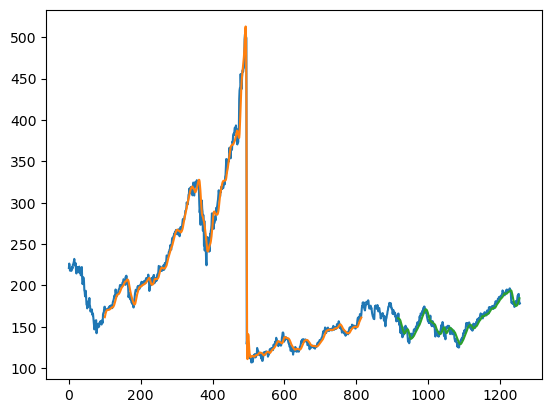

In [37]:
# plotting
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
# orange = train data
# green = test data

In [39]:
len(test_data)

440

In [40]:
x_input = test_data[340:].reshape(1,-1)

In [41]:
x_input.shape

(1, 100)

In [42]:
# converting into list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
temp_input

[0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19

In [44]:
from numpy import array

output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1
    

 

[0.19490492]
101
1 day input [0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 

8 day output [[0.18973729]]
9 day input [0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 

16 day output [[0.18566799]]
17 day input [0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661
 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884
 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451 0.20295554
 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503 0.19490492
 0.19390085 0.1930117

24 day output [[0.1830186]]
25 day input [0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.19490492 0.19390085 0.19301178
 0.19231005 0.19174364 0.1912428  0.19075641 0.19025734 0.18973729
 0.18919954 0.18865283

In [45]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [46]:
len(df1)

1256

In [47]:
df3= df1.tolist()
df3.extend(output)

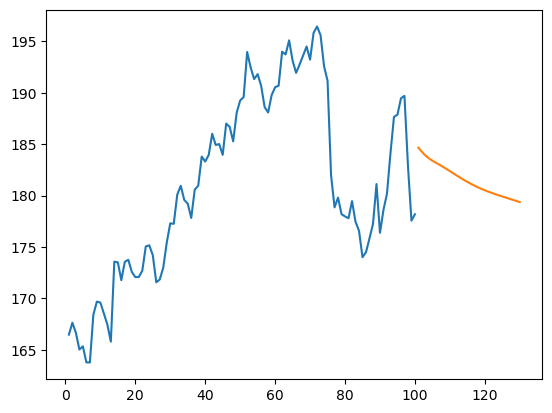

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(output))

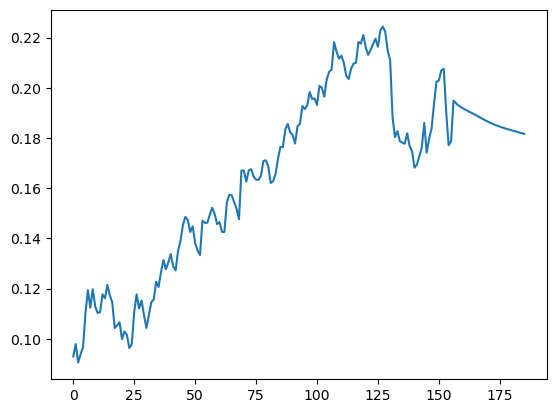

In [49]:
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[1100:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

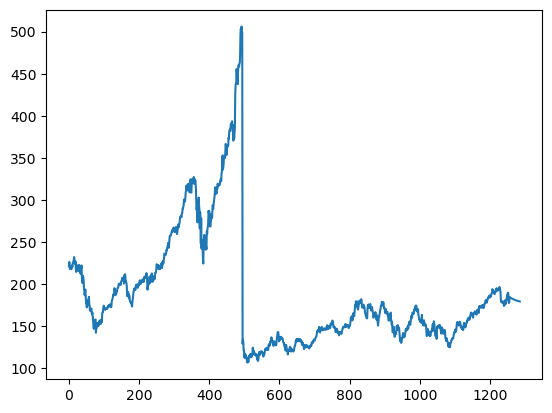

In [51]:
plt.plot(df3)